In [1]:
from kitaev import *
from tqdm import tqdm
from scipy.misc import derivative as dif
from scipy.integrate import quad
#plt.style.use(["seaborn-poster",'mystyle.mplstyle'])
plt.style.use(["seaborn-poster",'normal_font.mplstyle'])

C:\Users\eslam\AppData\Local\Temp\ipykernel_11524\3836836580.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-poster",'normal_font.mplstyle'])


In [3]:
t=1
N_global = 100
d_global = 2
mu1 = 0 * t 
mu2 = 6.5 * t 
delta1 = 1 * t 
delta2 = 1 * t 
t1 = 1 * t 
t2 = 1 * t
h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))
var_T = np.linspace(0.2, 5, 1001)
#var_T = [0.5, 1.5, 2.3,4.7] #for mu2 = 3
var_T = [0.9, 1.5, 2, 2.8, 4.5] #for mu2 = 6.5
#var_T = np.arange(0.2,5.005,0.005)
#var_T = np.linspace(1.6, 1.8, 51)
#var_w = np.linspace(-1+1e-4,-1e-4,100)
#var_w = np.linspace(1e-4,1-1e-4,100)
var_w = np.linspace(-1.2,1.2,481)
#var_w = np.linspace(-1.2,1.2,10001)
#var_w = np.linspace(-1,1,1001)
#var_w = np.arange(-1.2,1.201,0.005)
#var_w = np.array([0,1])
fs_odd = []
fs_bulk_odd = []
#Gs_even = []

#delta_amount =  1E-6
delta_amount =  1E-6
delta_positive_0 = (delta_amount * 1j) 
delta_negative_0 = (-delta_amount * 1j)
delta_positive_pi = (1 - delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_pi = (1 + delta_amount * 1j) * np.eye(N_global * d_global)

delta_positive_pi_2 = (-1 - delta_amount * 1j) * np.eye(N_global * d_global)
delta_negative_pi_2 = (-1 + delta_amount * 1j) * np.eye(N_global * d_global)

energiesv2 = []
zero_modes_nums = []
pi_modes_nums = []

for j in tqdm(range(len(var_T))):
    eval, evec = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])

    eval = eval.real
    energiesv2.append(np.sort([(-1) ** n * val for n, val in enumerate(np.sort(np.abs(eval)))]))
    evec_inv = la.inv(evec)
    G_odd = []
    G_odd_bulk = []
    #G_even = []
    
    for w in var_w:
        
        delta_positive = (w + delta_amount * 1j) 
        delta_negative = (-w - delta_amount * 1j)

        if np.abs(w) < 1 + 1e-2: #e_threshold:    
            G_pos = np.diag(1/(delta_positive - eval))
            G_neg = np.diag(1/(delta_negative - eval))
            #G_odd.append((evec @ (G_pos - G_neg) @ evec_inv / 2)[0,1])
            g = ((evec @ (G_pos - G_neg) @ evec_inv / 2))
            G_odd.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
            G_odd_bulk.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
            #G_even.append(evec @ (G_pos + G_neg) @ evec_inv / 2)

        else:
            delta_positive = (w - delta_amount * 1j) 
            delta_negative = (w + delta_amount * 1j)
            delta_positive_2 = 0  +(-w - delta_amount * 1j)
            delta_negative_2 = 0  +(-w + delta_amount * 1j)
            G_pi_pos = np.diag(1/(delta_positive - eval) + 1/(delta_positive_2 - eval))
            G_pi_neg = np.diag(1/(delta_negative - eval) + 1/(delta_negative_2 - eval))
            #G_odd.append((evec @ (G_pi_pos - G_pi_neg) @ evec_inv / 4)[0,1])
            g = ((evec @ (G_pi_pos - G_pi_neg) @ evec_inv / 4))
            G_odd.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
            G_odd_bulk.append([(g[0+n*d_global,1+n*d_global]) for n in range(N_global)])
            #G_even.append(evec @ (G_pi_pos + G_pi_neg) @ evec_inv / 4)
    
    #Gs_even.append(G_even)
    fs_odd.append(G_odd)
    fs_bulk_odd.append(G_odd_bulk)
    #modes_ind,cnt_modes = check_modes(eval, 0)
    #zero_modes_nums.append(cnt_modes)
    #modes_ind,cnt_modes = check_modes(eval, 1)
    #pi_modes_nums.append(cnt_modes)
    pass
fs_bulk_odd = np.array(fs_bulk_odd)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


1.0000000000000002


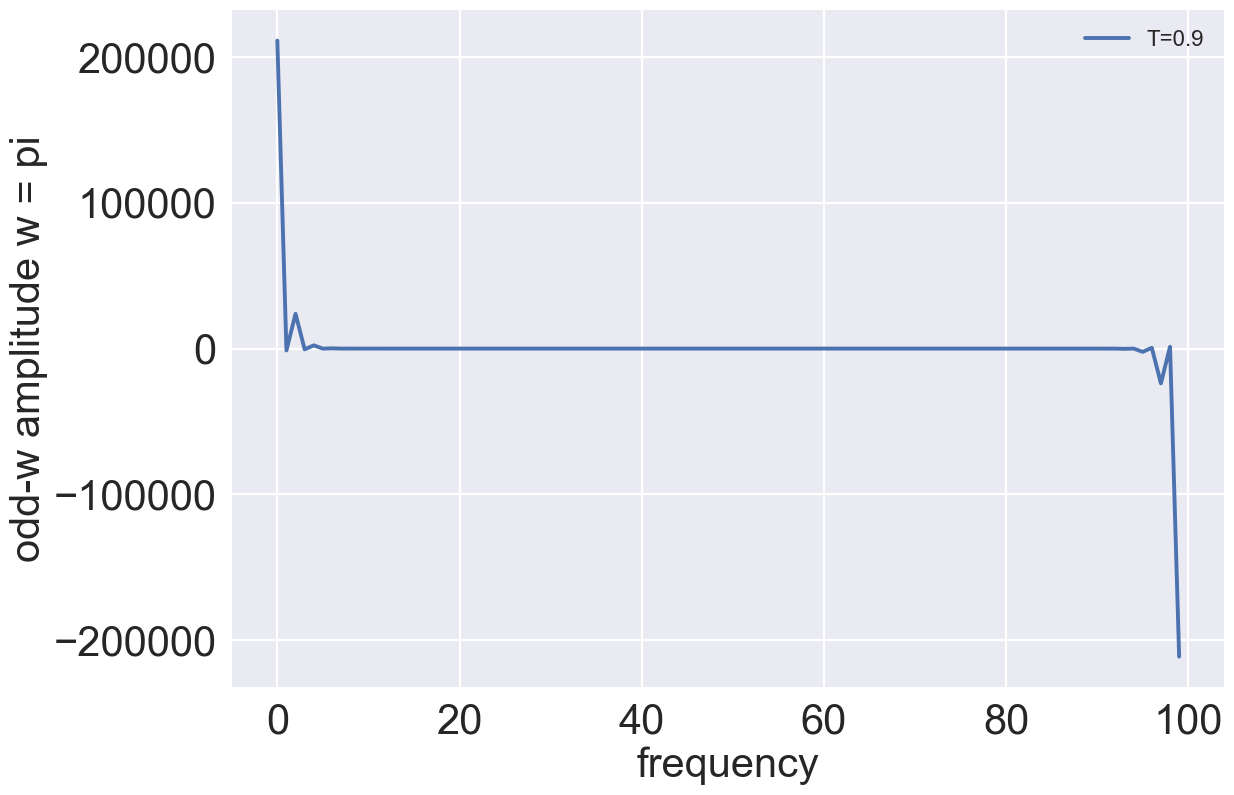

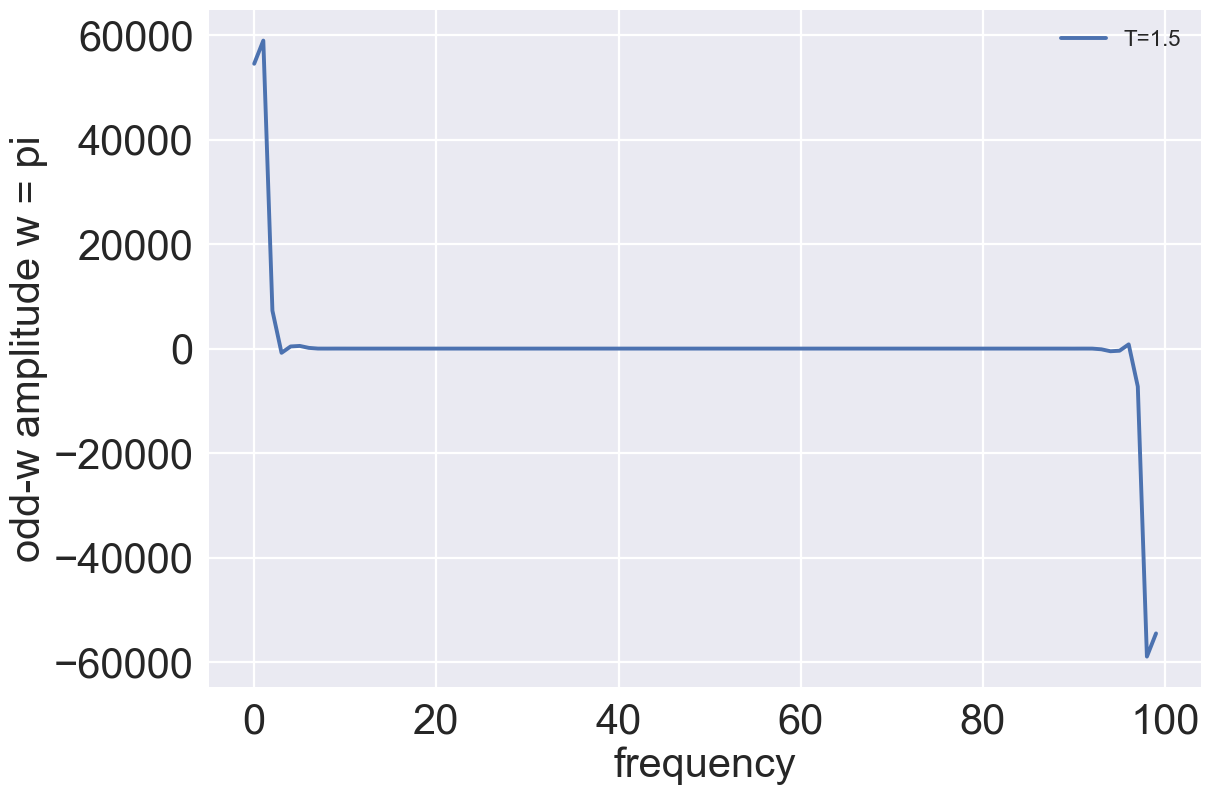

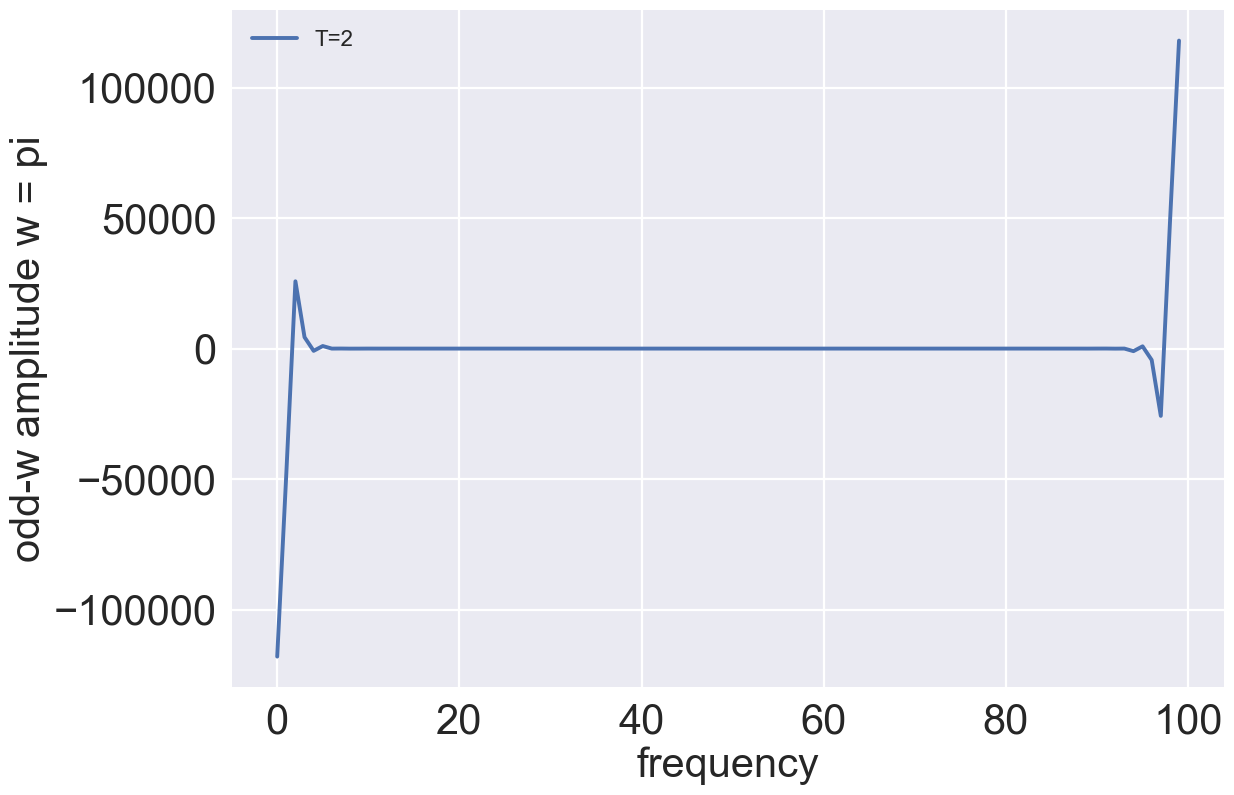

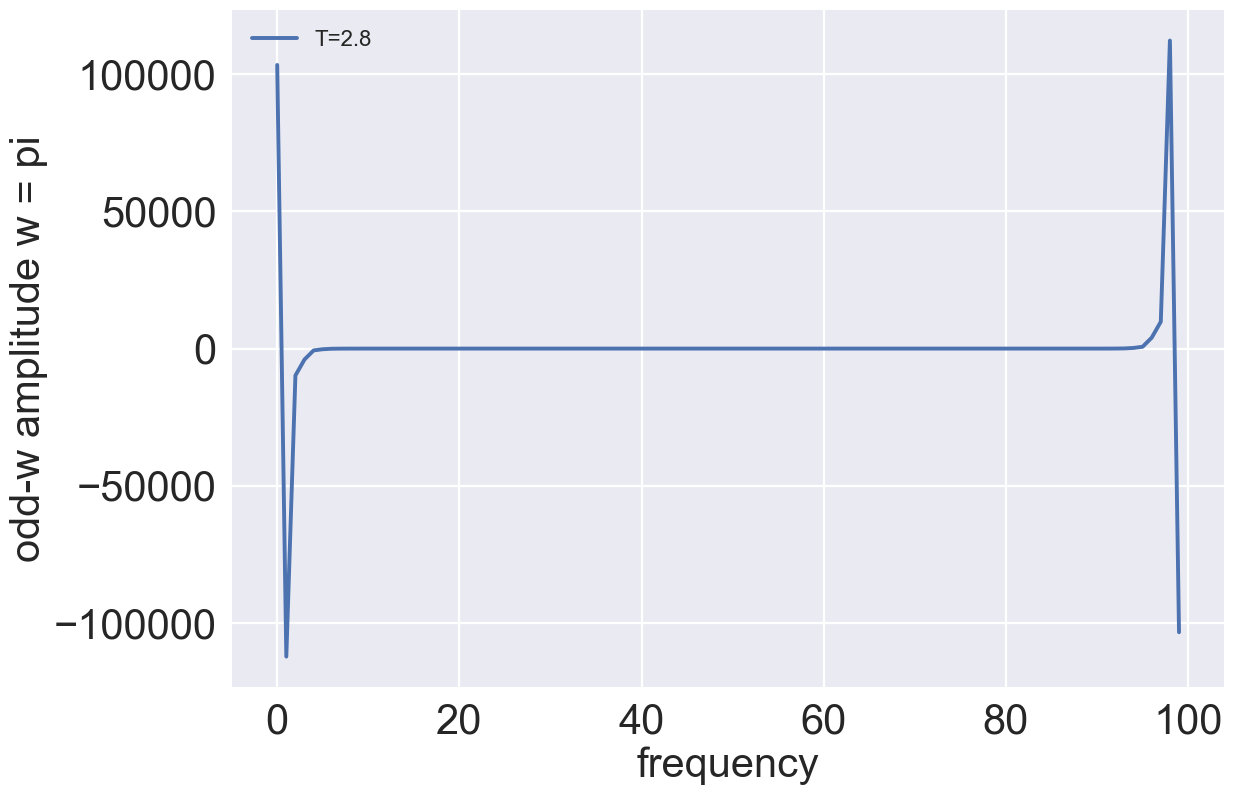

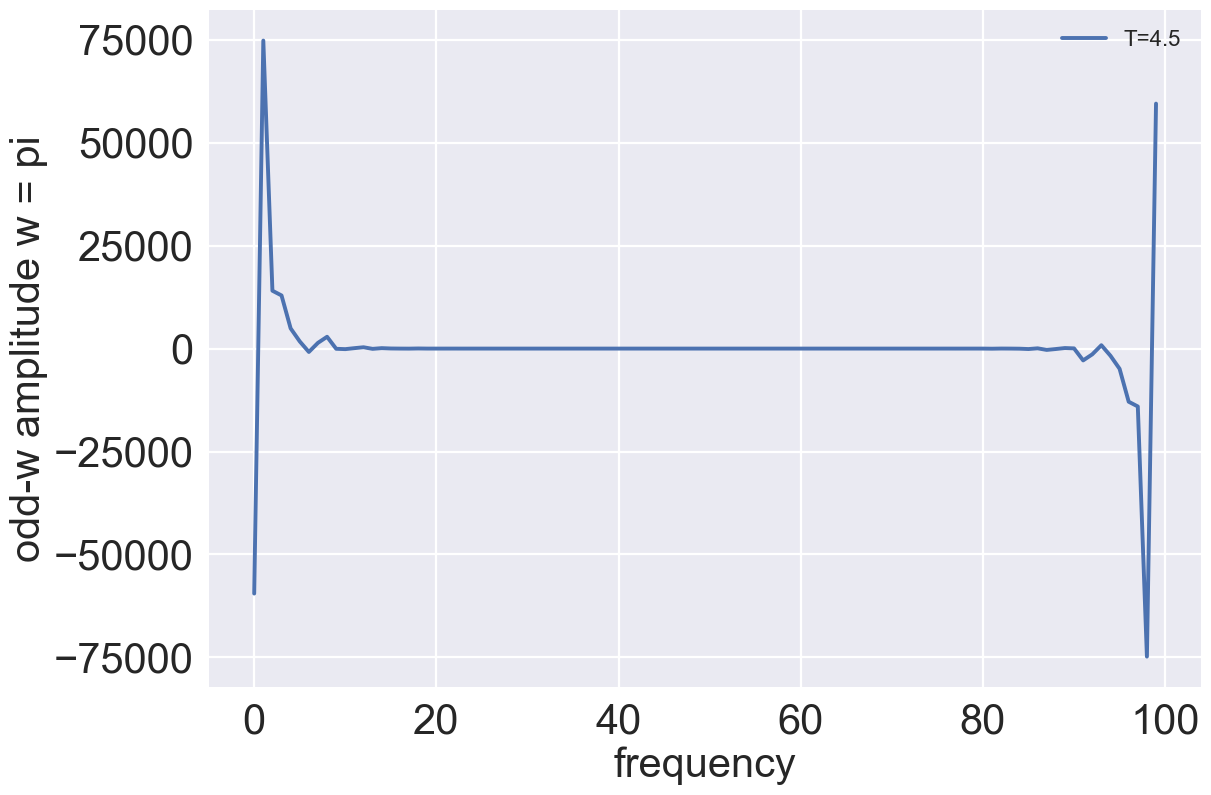

0.0


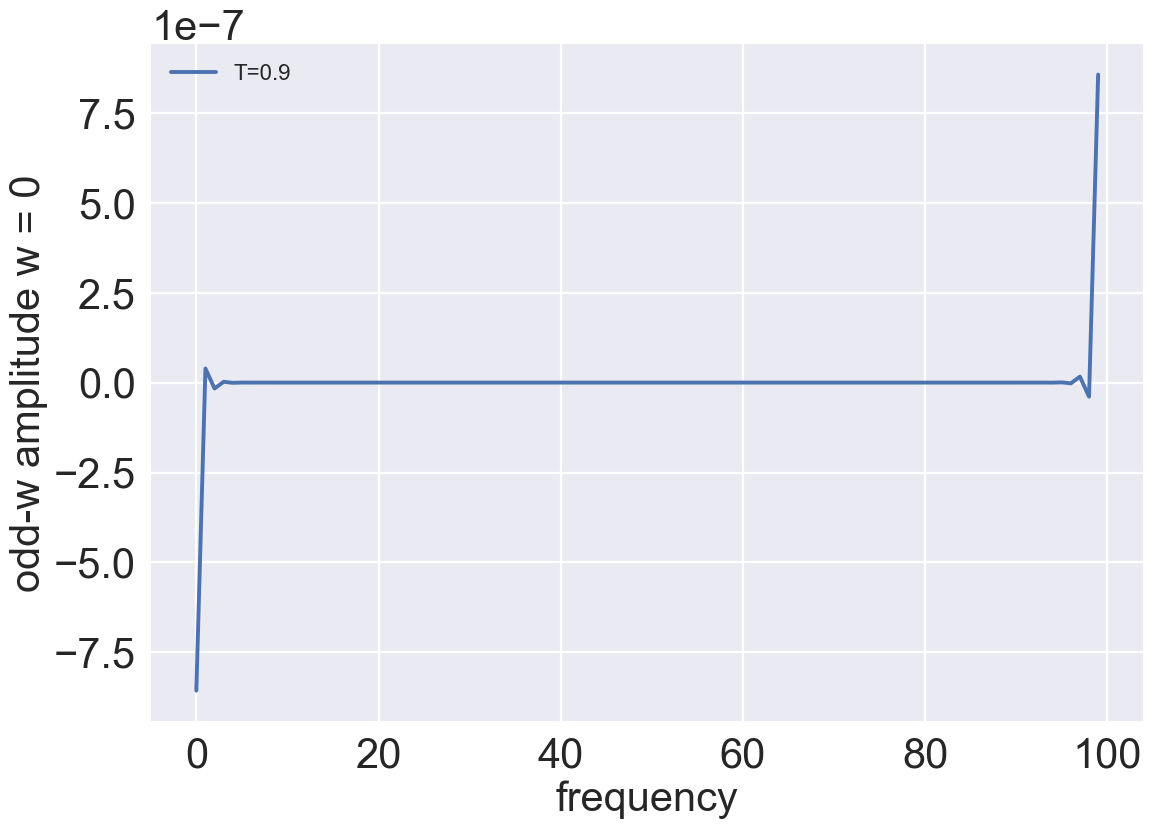

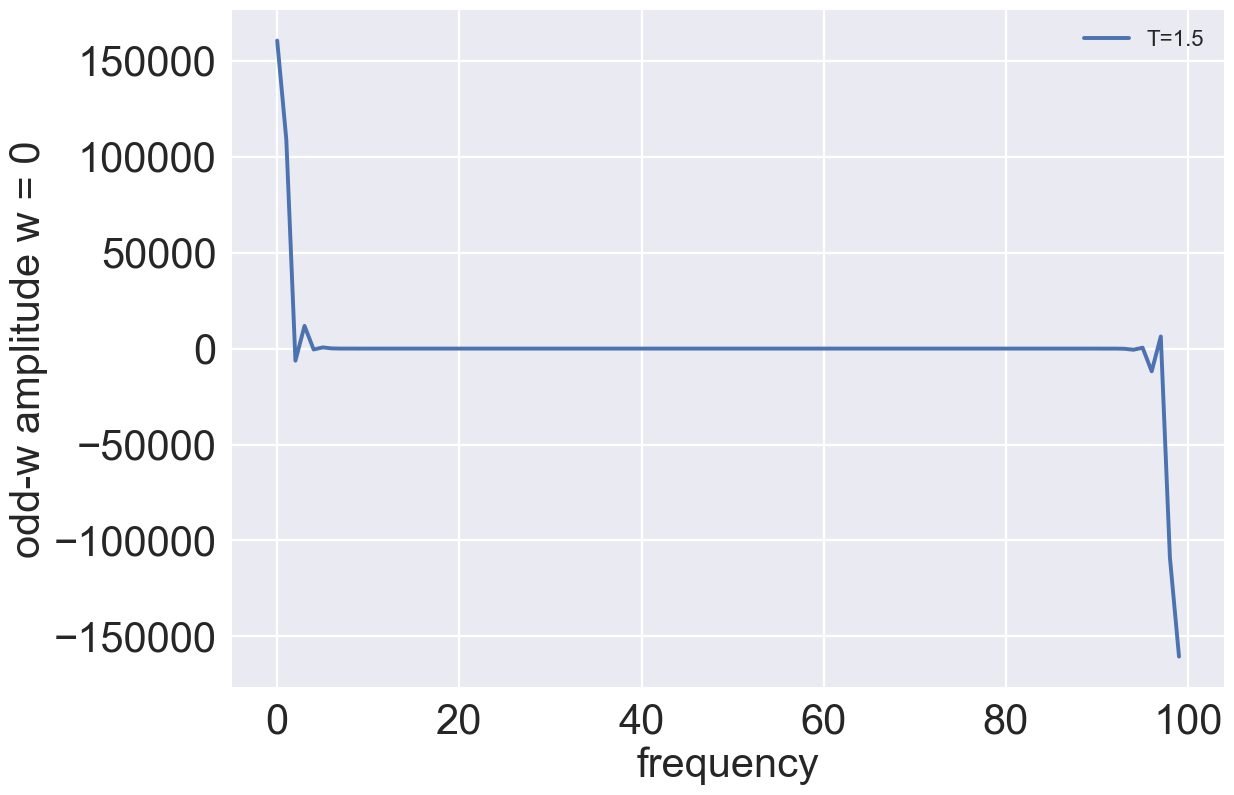

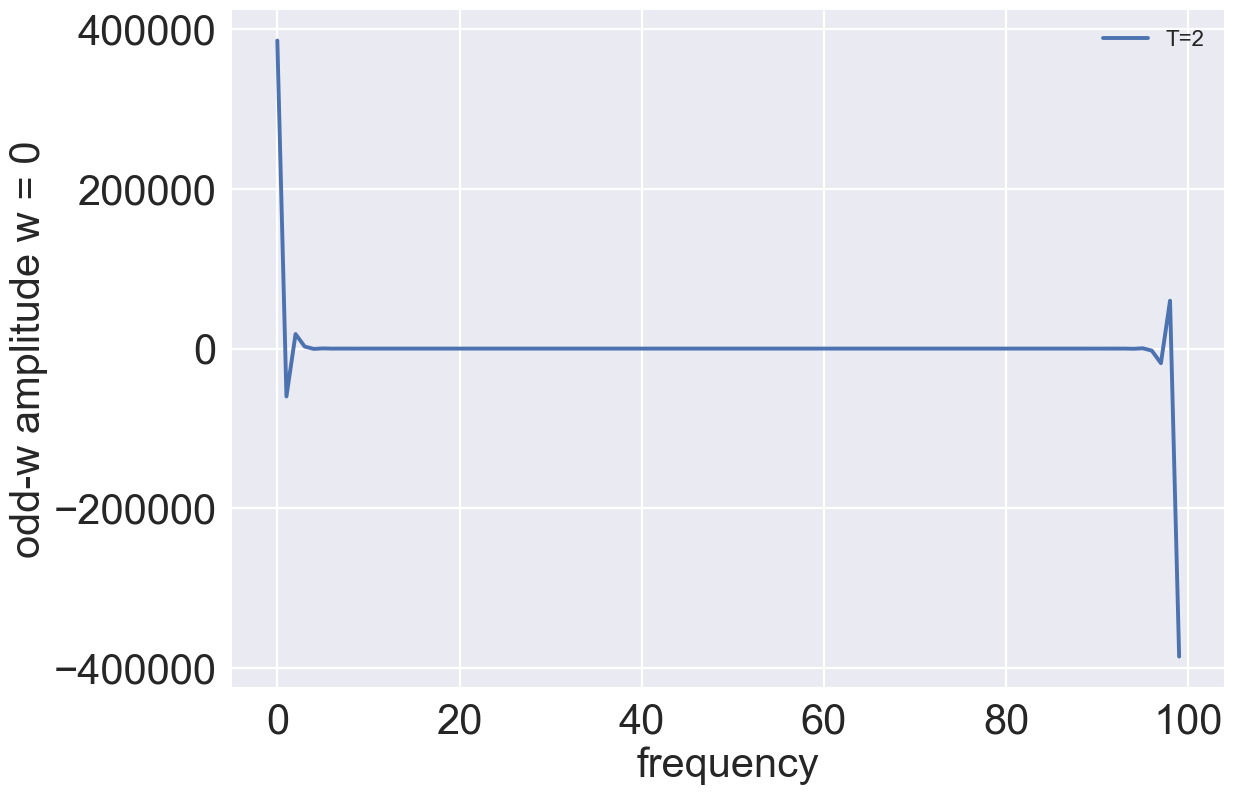

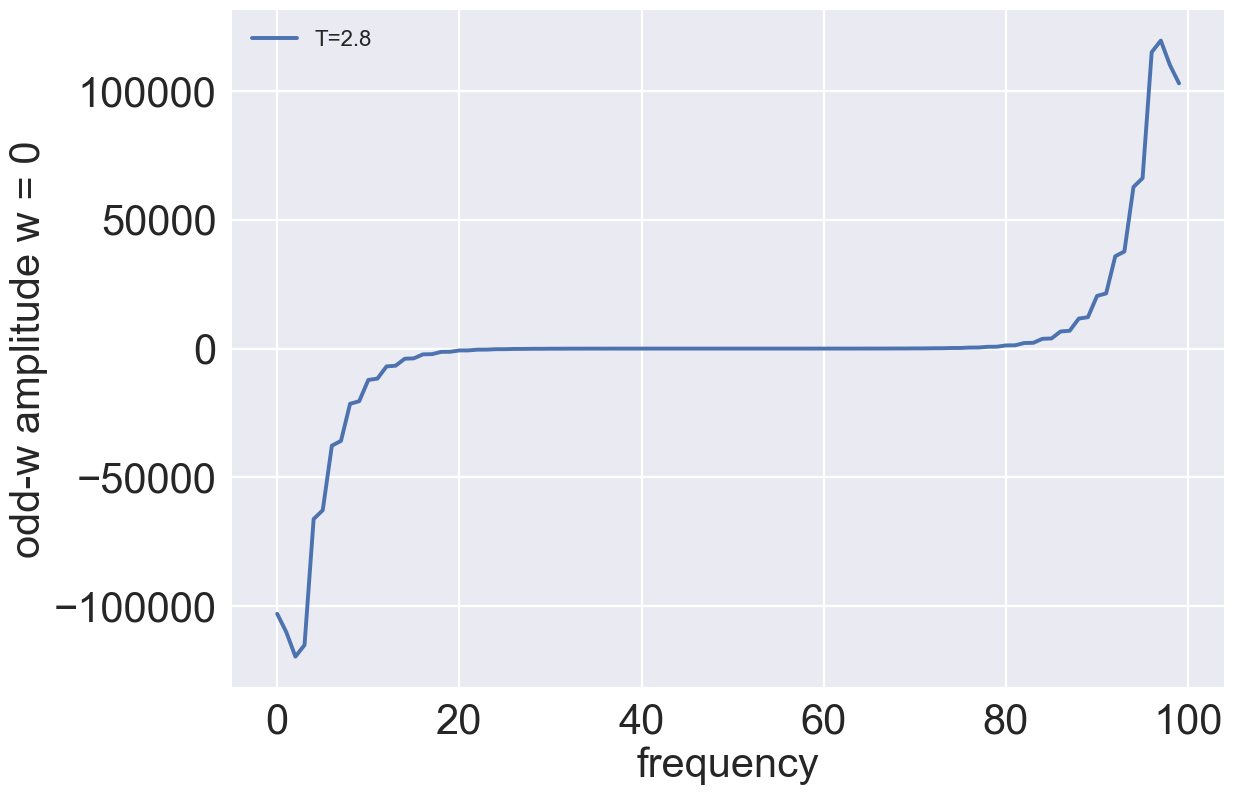

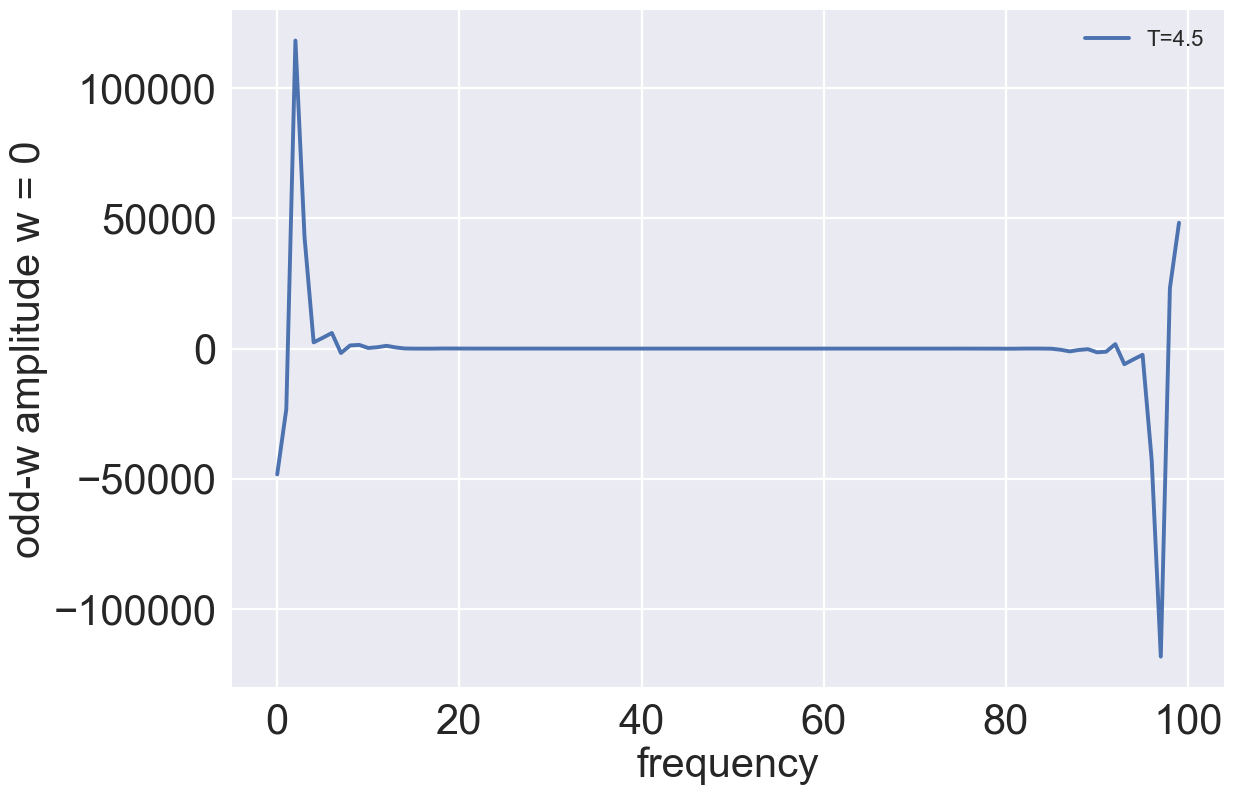

In [6]:
print(var_w[440])
plt.title(f"")
for j in range(len(var_T)):
    f_odd = np.array((fs_bulk_odd[j][440]))
    plt.plot((f_odd).imag, label=f'T={var_T[j]}')
    plt.ylabel('odd-w amplitude w = pi')
    plt.xlabel('frequency')
    #plt.yscale('symlog')
    plt.legend()
    #plt.savefig(f'odd-w vs w-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
    plt.show()

print(var_w[240])
plt.title(f"")
for j in range(len(var_T)):
    f_odd = np.array((fs_bulk_odd[j][240]))
    #f_odd = np.array([(fs_bulk_odd1[j][i][0]) for i in range(len(var_w))])
    plt.plot((f_odd).imag, label=f'T={var_T[j]}')
    plt.ylabel('odd-w amplitude w = 0')
    plt.xlabel('frequency')
    #plt.yscale('symlog')
    plt.legend()
    #plt.savefig(f'odd-w vs w-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
    plt.show()

Text(0, 0.5, 'frequency')

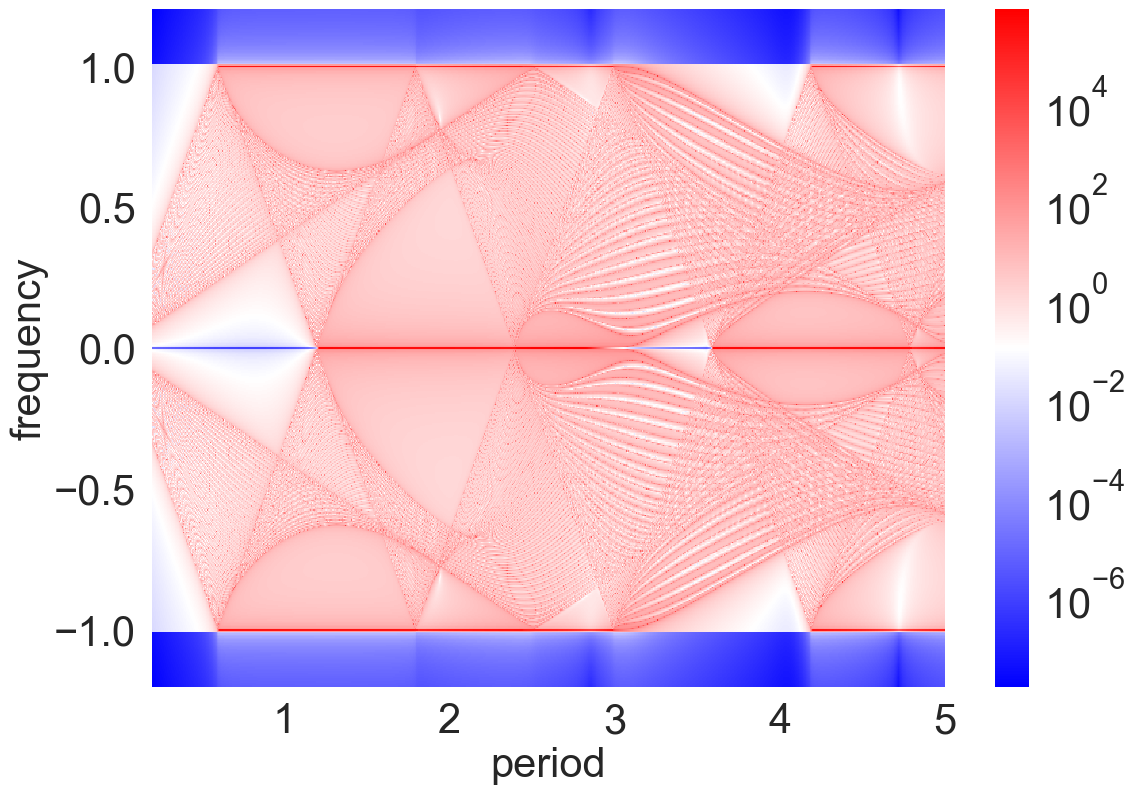

In [147]:
X, Y = np.meshgrid(var_T, var_w)
Z = np.zeros((len(var_w),len(var_T)),dtype=complex)
for i in range(len(var_T)):
    for j in range(len(var_w)):
        Z[j,i] = fs_odd[i][j]

fig, ax = plt.subplots()

# Default norm:
pcm = ax.pcolormesh(X, Y, (np.abs(Z)), cmap='bwr',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
ax.set_title('')
ax.set_xlabel('period')
ax.set_ylabel('frequency')
#plt.savefig(f"odd-w vs period vs frequency-mu1={mu1}t mu2={mu2}t delta={delta1}t N={N_global}v2.pdf",bbox_inches = 'tight')


In [25]:
t=1
N_global = 100
d_global = 2
mu1 = 0 * t 
delta1 = 1 * t 
delta2 = 1 * t 
t1 = 1 * t 
t2 = 1 * t
var_T = np.arange(0.2, 5, 0.1)
var_mu = np.arange(0.001,8,0.1)
#var_T = np.linspace(0.2, 5*np.pi, 501)
#var_mu =np.linspace(0, 8, 501)
#var_T = np.linspace(1.6, 1.8, 51)
#var_w = np.linspace(-1+1e-4,-1e-4,100)
#var_w = np.linspace(1e-4,1-1e-4,100)
#var_w = np.linspace(-1,1,101)
#var_w = np.array([0,1])
fs_odd = []
fs_bulk_odd_zero = []
fs_bulk_odd_pi = []
#Gs_even = []




for i in tqdm(range(len(var_mu))):    
    mu2 = var_mu[i] * t 
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
    h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))
    G_odd = []
    for j in tqdm(range(len(var_T))):
        eval, evec = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])

        eval = eval.real
        energiesv2.append(np.sort([(-1) ** n * val for n, val in enumerate(np.sort(np.abs(eval)))]))
        evec_inv = la.inv(evec)
        
        #G_even = []
        w = 1

        delta_positive = (w - delta_amount * 1j) 
        delta_negative = (w + delta_amount * 1j)
        delta_positive_2 = 0  +(-w - delta_amount * 1j)
        delta_negative_2 = 0  +(-w + delta_amount * 1j)
        G_pi_pos = np.diag(1/(delta_positive - eval) + 1/(delta_positive_2 - eval))
        G_pi_neg = np.diag(1/(delta_negative - eval) + 1/(delta_negative_2 - eval))
        g = ((evec @ (G_pi_pos - G_pi_neg) @ evec_inv / 4))
        G_odd.append(sum([(g[0+n*d_global,1+n*d_global]) for n in range(int(np.ceil(N_global/2)))]))
                
    fs_odd.append(G_odd)
       
    pass

  5%|▌         | 4/80 [00:46<14:50, 11.71s/it]

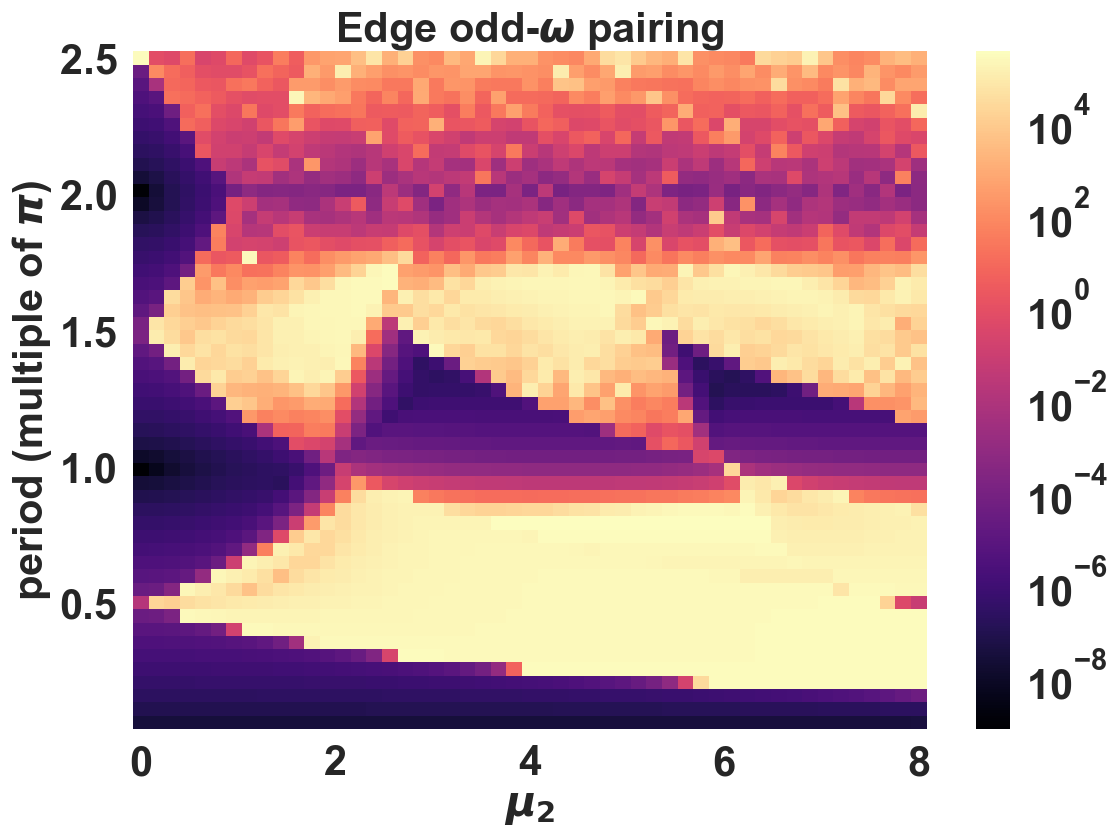

In [100]:
X, Y = np.meshgrid(var_mu.real, var_T.real)
Z = np.zeros((len(var_T),len(var_mu)),dtype=complex)
for i in range(len(var_mu)):
    for j in range(len(var_T)):
        Z[j,i] = fs_odd[i][j]

fig, ax = plt.subplots()

# Default norm:
pcm = ax.pcolormesh(X, Y/np.pi, (np.abs(Z)), cmap='magma',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
ax.set_title('Edge odd-$\omega$ pairing')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period (multiple of $\pi$)')
#plt.savefig(f"odd-w pi energy vs period vs mu2-mu1={mu1}t delta={delta1}t N={N_global}v2.pdf",bbox_inches = 'tight')


In [14]:

fs_odd = np.array(fs_odd)
print(fs_odd.shape)

(961, 482)


In [90]:
for i,j in enumerate(var_w):
    print(i,j)

0 -1.2
1 -1.1976
2 -1.1952
3 -1.1927999999999999
4 -1.1904
5 -1.188
6 -1.1856
7 -1.1832
8 -1.1807999999999998
9 -1.1784
10 -1.176
11 -1.1736
12 -1.1712
13 -1.1688
14 -1.1663999999999999
15 -1.164
16 -1.1616
17 -1.1592
18 -1.1568
19 -1.1543999999999999
20 -1.152
21 -1.1496
22 -1.1472
23 -1.1448
24 -1.1423999999999999
25 -1.14
26 -1.1376
27 -1.1352
28 -1.1328
29 -1.1303999999999998
30 -1.128
31 -1.1256
32 -1.1232
33 -1.1208
34 -1.1184
35 -1.1159999999999999
36 -1.1136
37 -1.1112
38 -1.1088
39 -1.1064
40 -1.1039999999999999
41 -1.1016
42 -1.0992
43 -1.0968
44 -1.0944
45 -1.092
46 -1.0896
47 -1.0872
48 -1.0848
49 -1.0824
50 -1.08
51 -1.0776
52 -1.0752
53 -1.0728
54 -1.0704
55 -1.068
56 -1.0655999999999999
57 -1.0632
58 -1.0608
59 -1.0584
60 -1.056
61 -1.0535999999999999
62 -1.0512
63 -1.0488
64 -1.0464
65 -1.044
66 -1.0415999999999999
67 -1.0392
68 -1.0368
69 -1.0344
70 -1.032
71 -1.0295999999999998
72 -1.0272
73 -1.0248
74 -1.0224
75 -1.02
76 -1.0176
77 -1.0151999999999999
78 -1.0128
79 -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


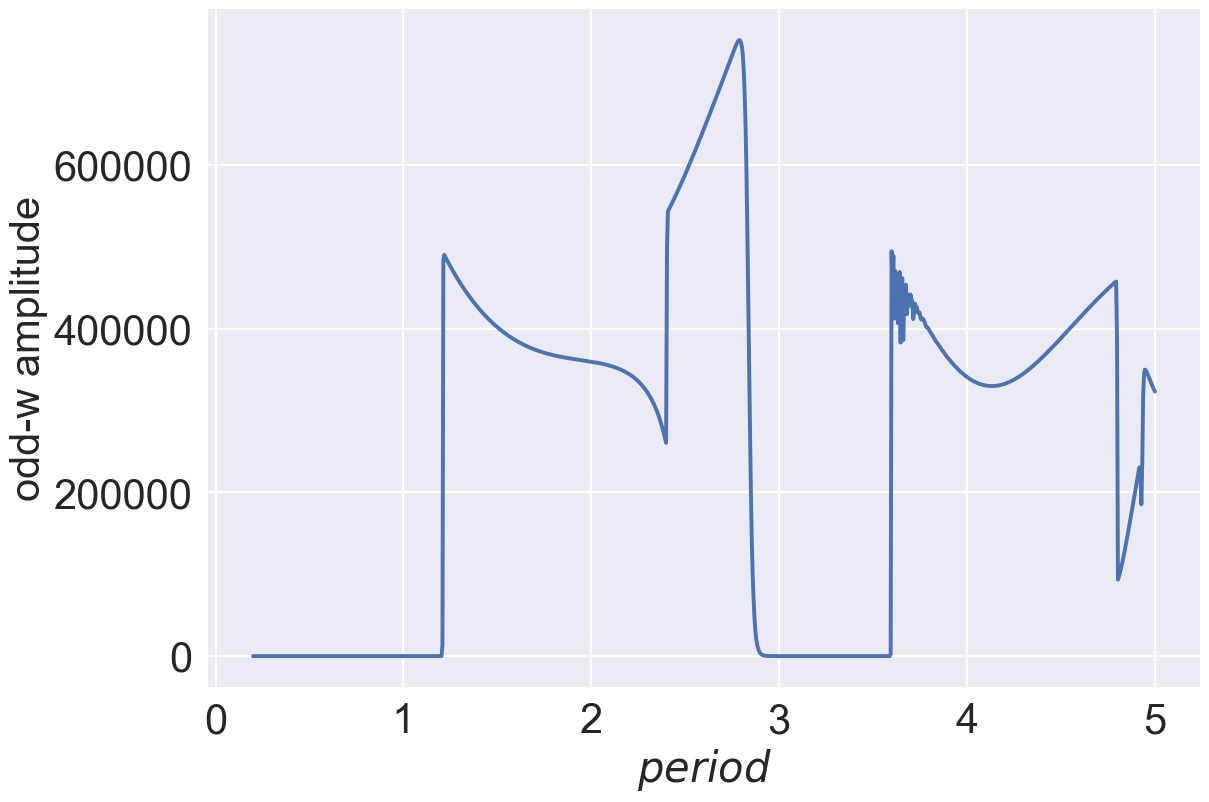

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


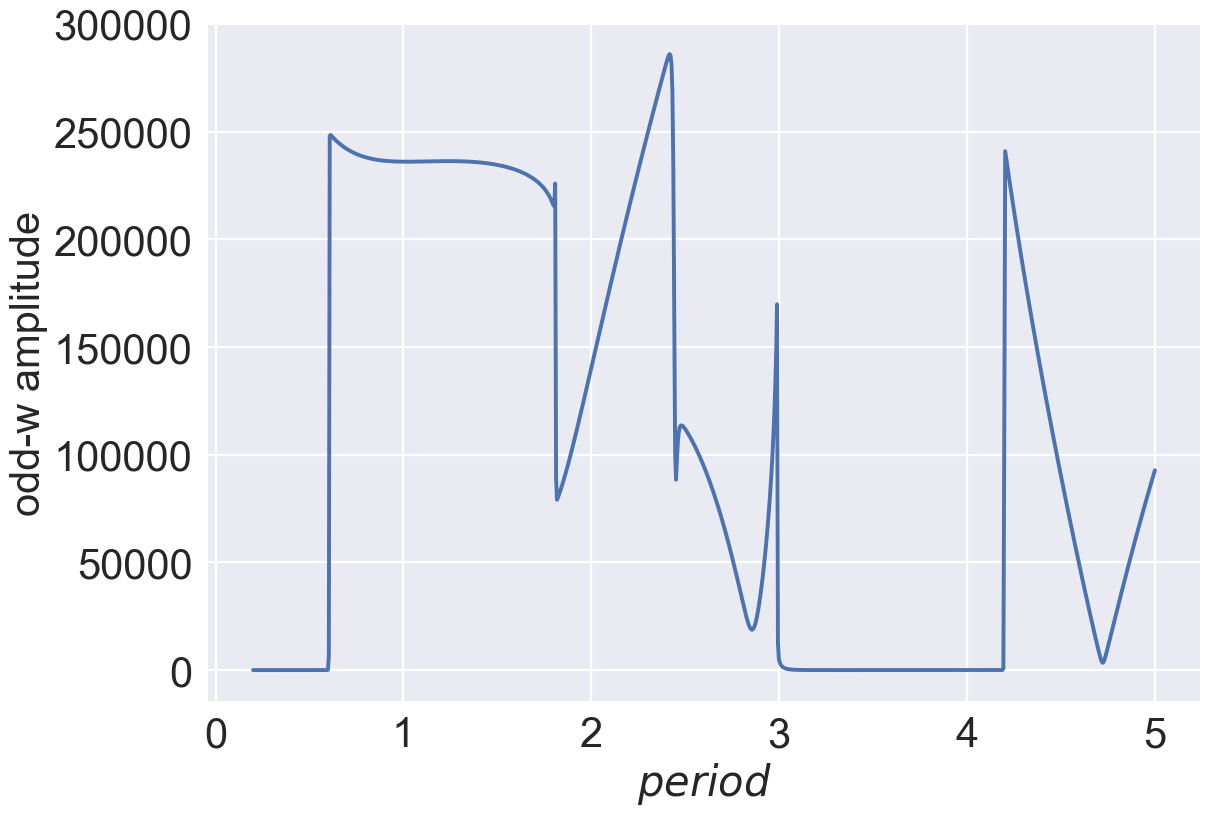

In [153]:
f_odd = np.array([(fs_odd[i][240]) for i in range(len(var_T))])
plt.title(f"")
plt.plot(var_T,np.abs(f_odd))
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
#plt.savefig(f'trace odd-w zero energy-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
plt.show()

f_odd = np.array([(fs_odd[i][440]) for i in range(len(var_T))])
plt.title(f"")
plt.plot(var_T,np.abs(f_odd))
plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
#plt.savefig(f'trace odd-w pi energy-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
plt.show()

In [68]:
print(fs_bulk_odd.shape)

(501, 481, 100)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


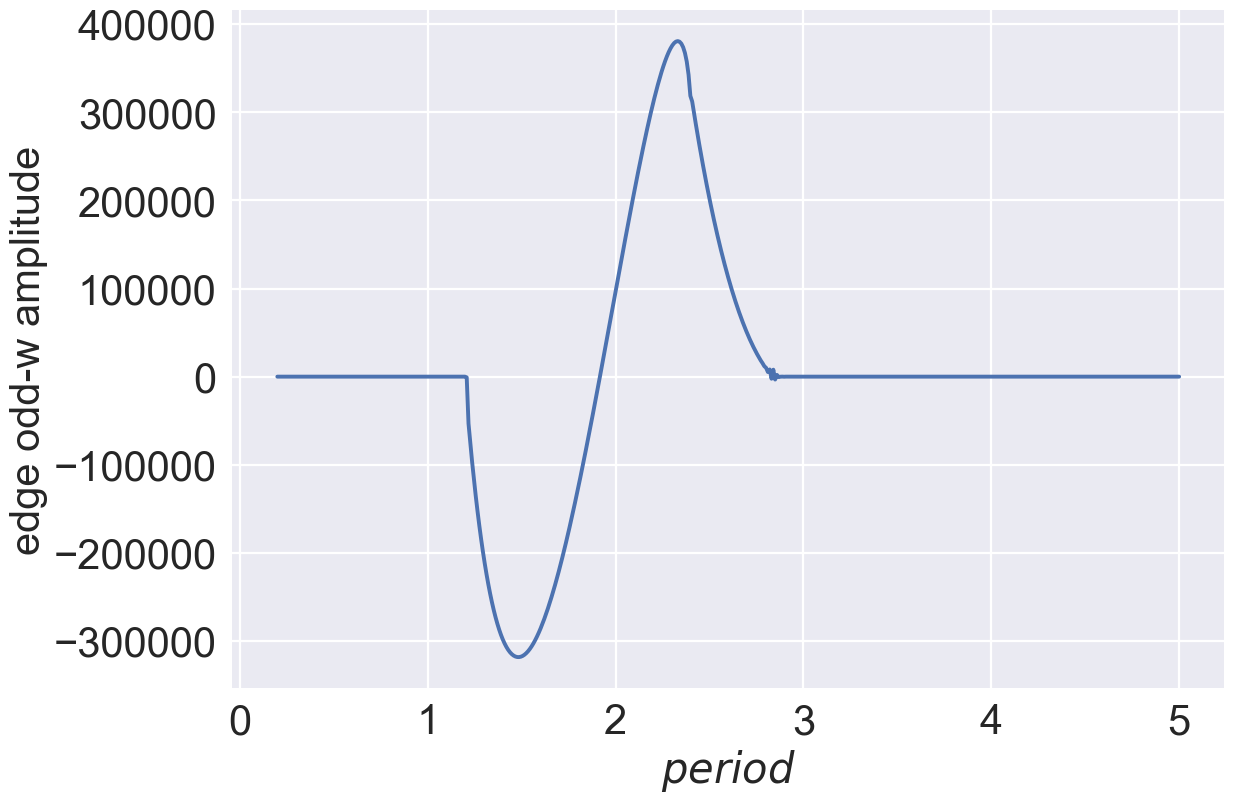

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


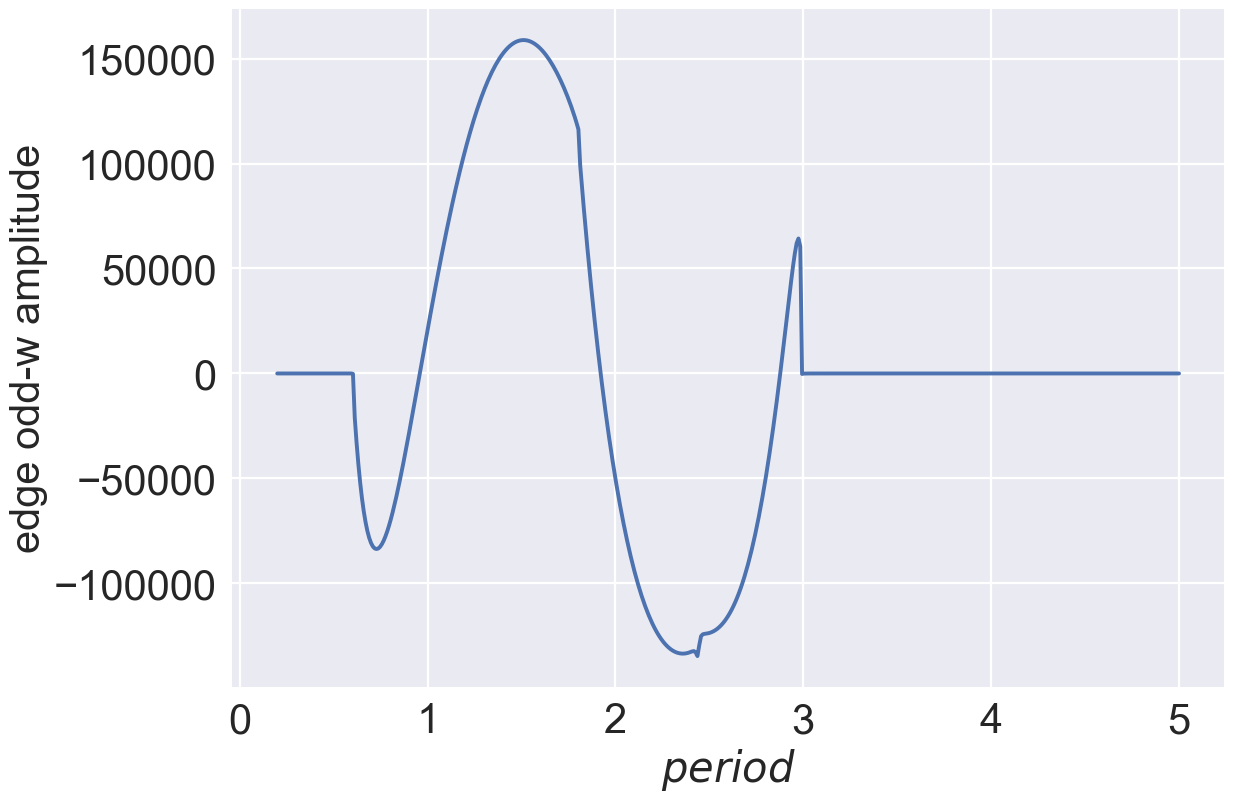

In [139]:
f_odd = np.array([(fs_bulk_odd[i][240][0]) for i in range(len(var_T))])
plt.title(f"")
plt.plot(var_T,(f_odd))
plt.ylabel('edge odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
#plt.savefig(f'edge odd-w zero energy-mu1={mu1}t mu2={mu2}t delta=t N={N_global}.pdf', bbox_inches = 'tight')
plt.show()

f_odd = np.array([(fs_bulk_odd[i][440][0]) for i in range(len(var_T))])
plt.title(f"")
plt.plot(var_T,(f_odd))
plt.ylabel('edge odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
#plt.savefig(f'edge odd-w pi energy-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
plt.show()

In [84]:
for i,j in enumerate(var_T):
    print(i,j)

0 0.9
1 1.5
2 2.9
3 4.5


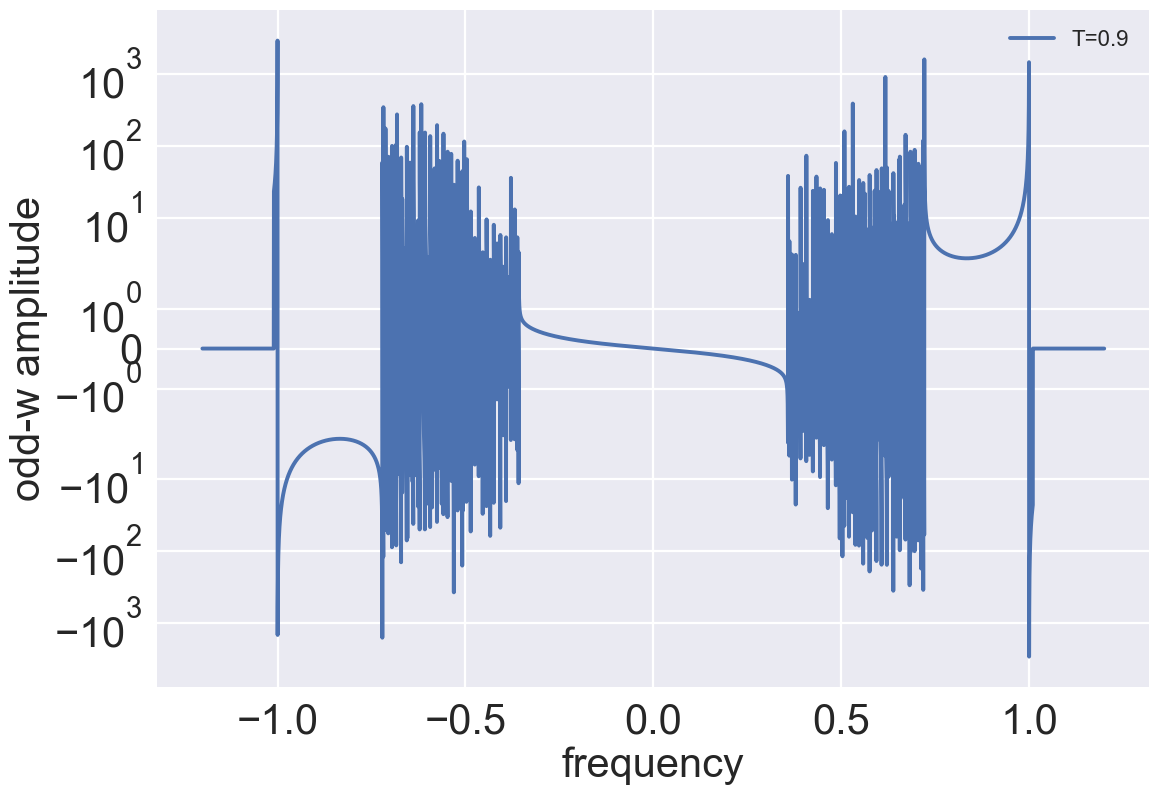

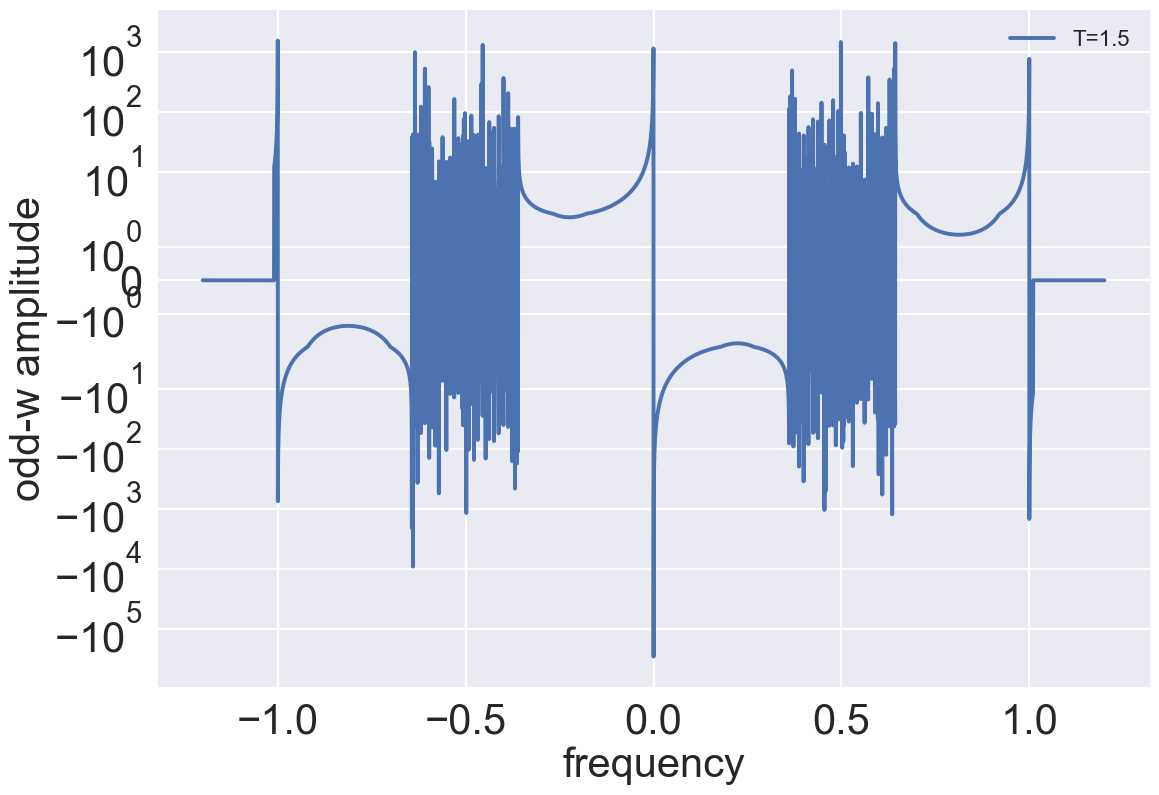

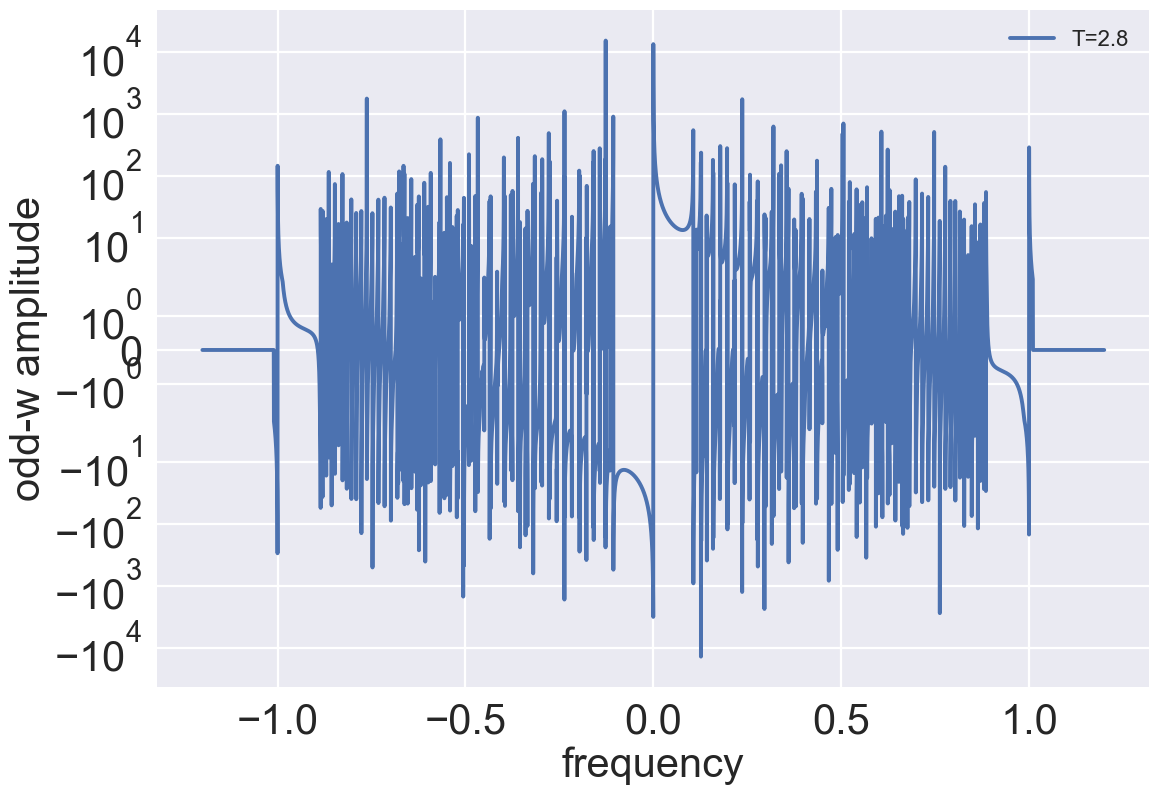

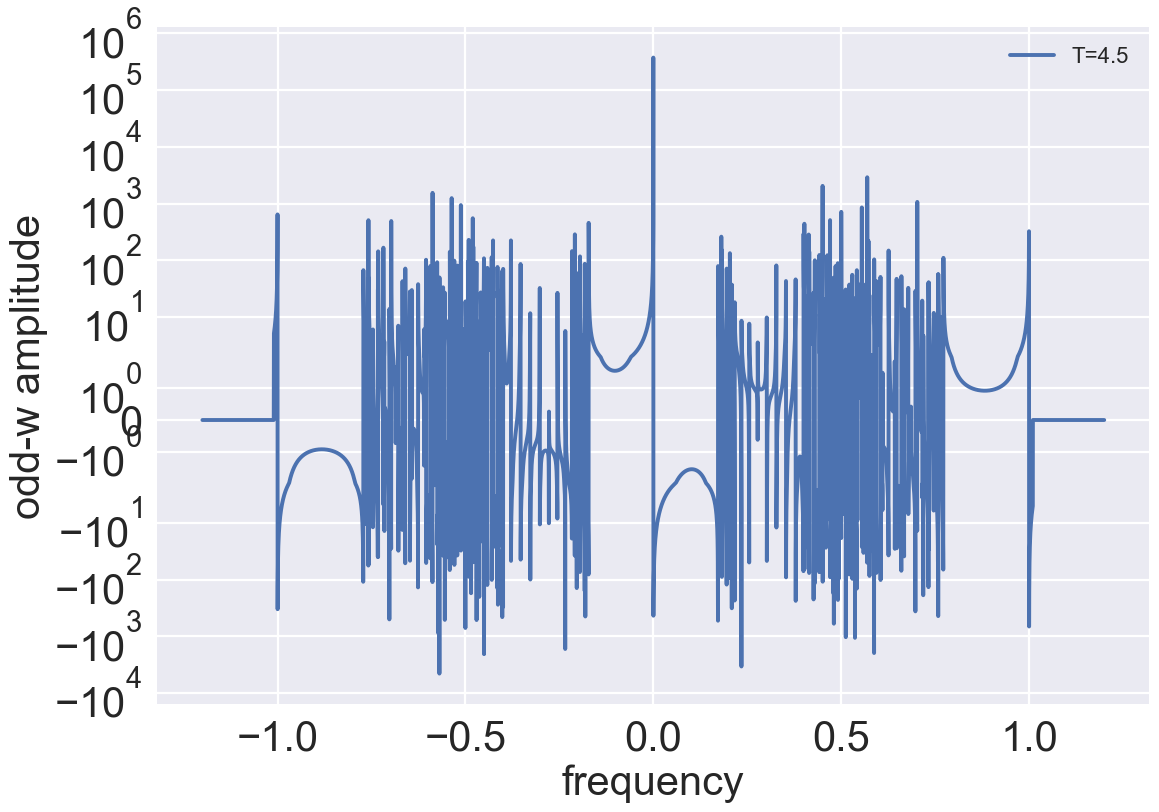

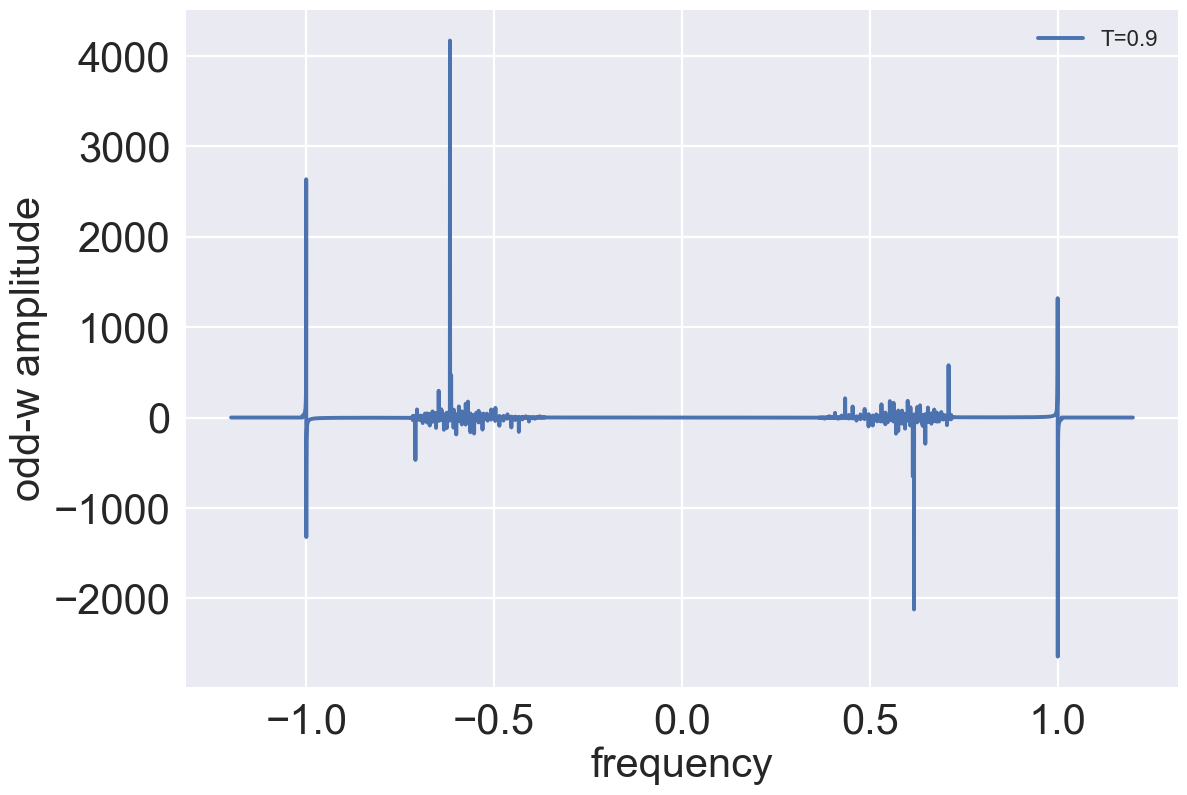

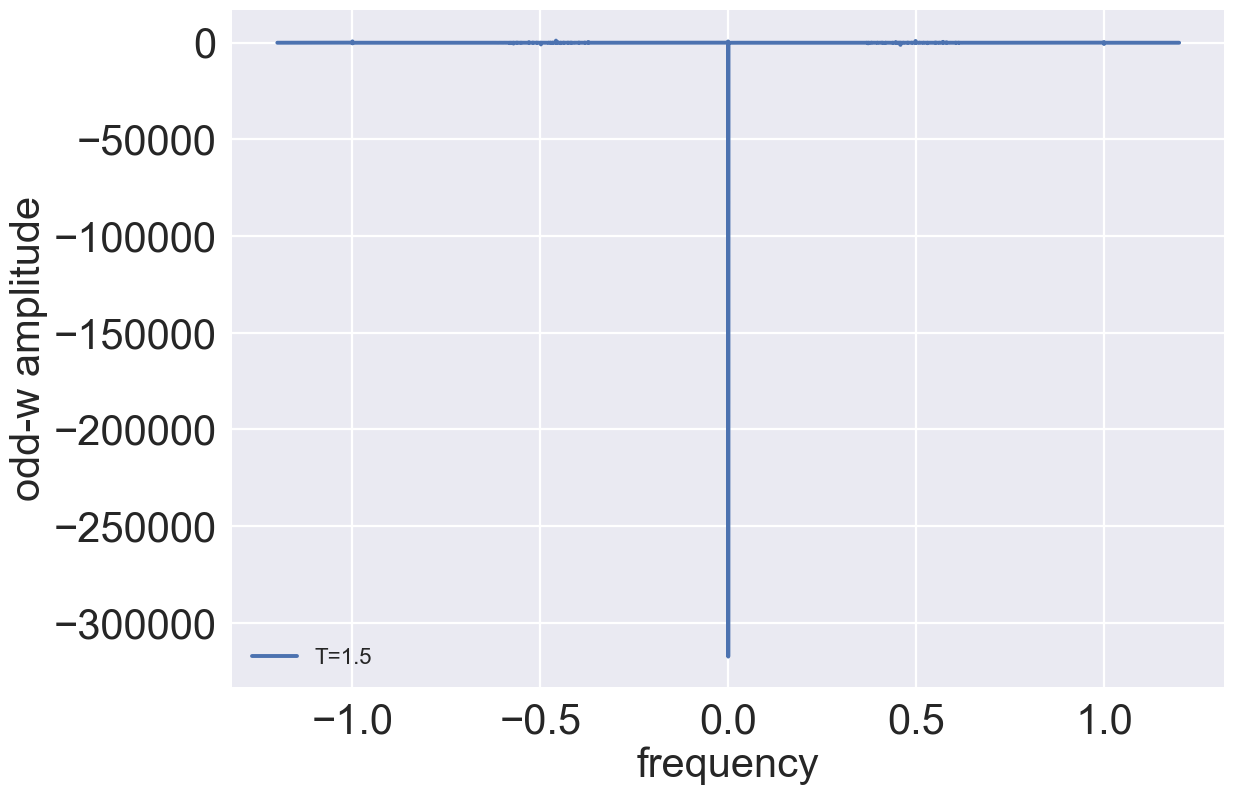

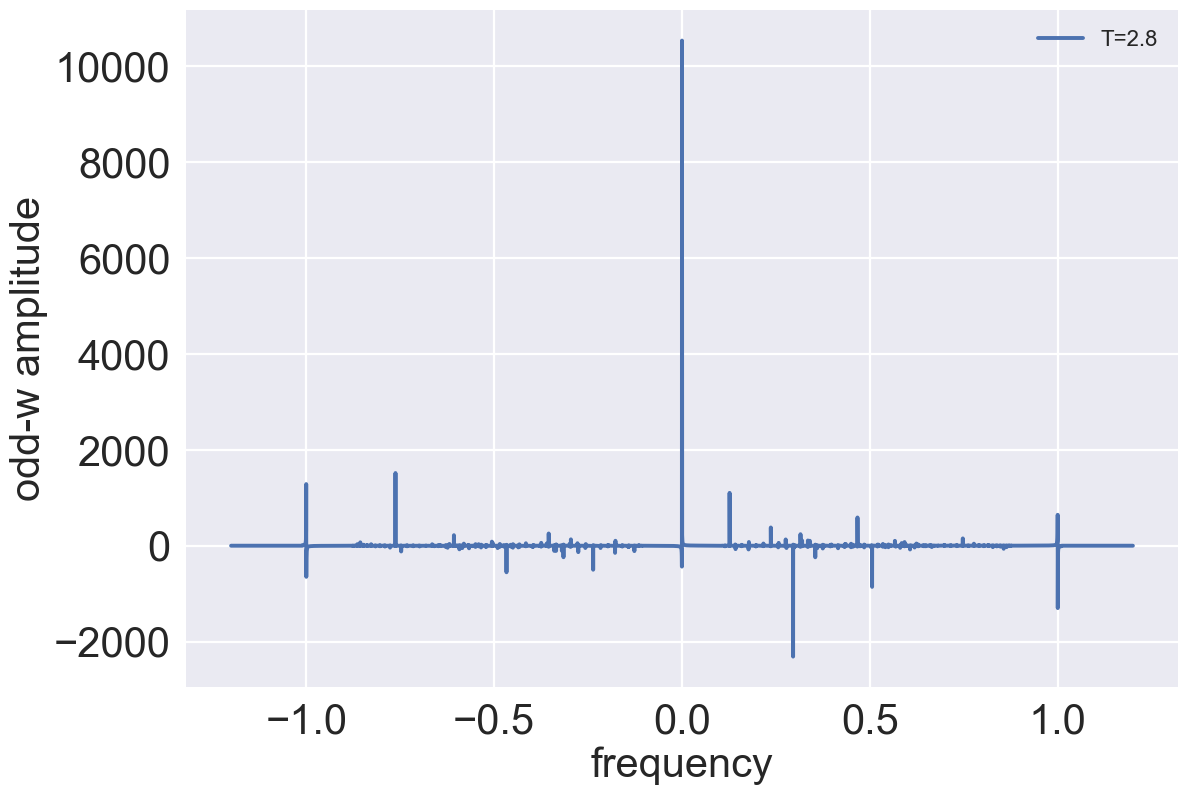

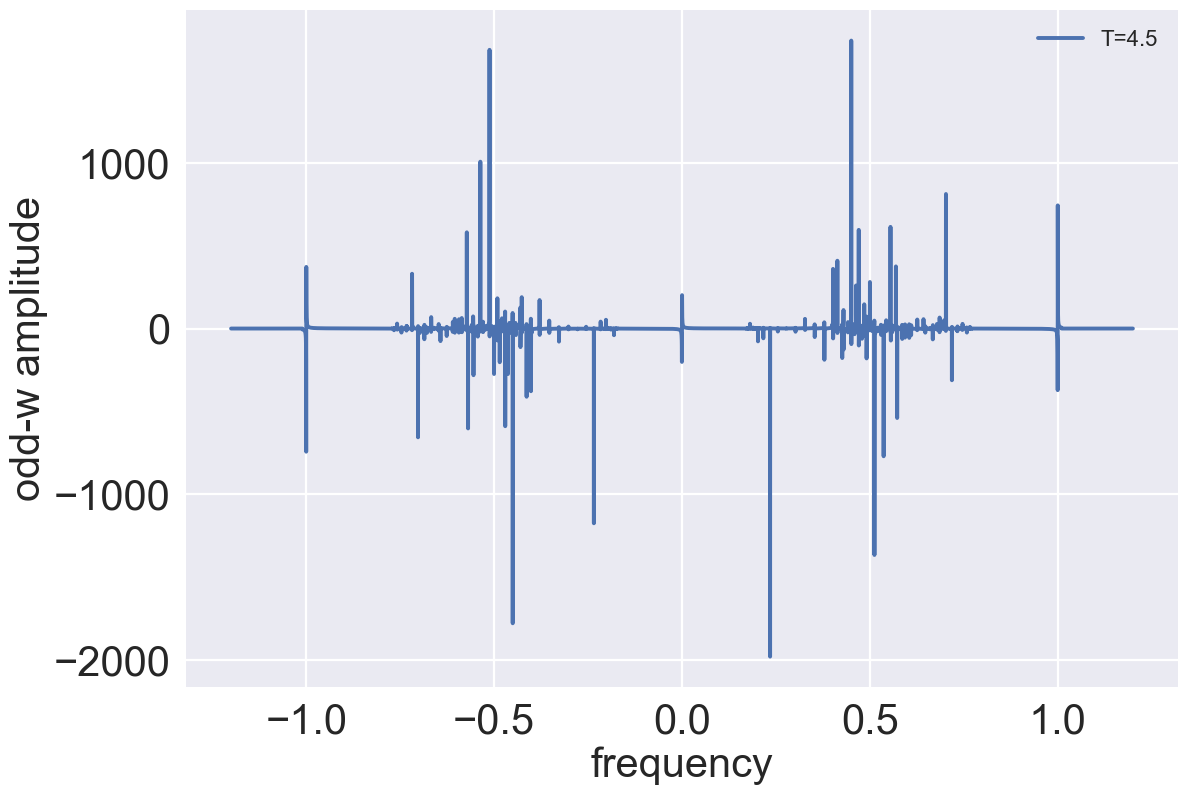

In [133]:
#nums = [73, 135, 281, 443] #indices for var_T when mu2 = 6.5
#nums = [31, 135, 219, 469] #indices for var_T when mu2 = 3 
plt.title(f"")
for j in range(len(var_T)):
    f_odd = np.array([(fs_odd[j][i]) for i in range(len(var_w))])
    plt.plot(var_w,(f_odd), label=f'T={var_T[j]}')
    plt.ylabel('odd-w amplitude')
    plt.xlabel('frequency')
    plt.yscale('symlog')
    plt.legend()
    #plt.savefig(f'odd-w vs w-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
    plt.show()


plt.title(f"")
for j in range(len(var_T)):
    f_odd = np.array([(fs_bulk_odd[j][i][0]) for i in range(len(var_w))])
    plt.plot(var_w,(f_odd), label=f'T={var_T[j]}')
    plt.ylabel('odd-w amplitude')
    plt.xlabel('frequency')
    #plt.yscale('symlog')
    plt.legend()
    #plt.savefig(f'odd-w vs w-mu1={mu1}t mu2={mu2}t delta=t N={N_global}v2.pdf', bbox_inches = 'tight')
    plt.show()

In [ ]:


'''f_odd = [(Gs_odd[75][1][0+n*d_global,1+n*d_global].imag) for n in range(N_global)]
plt.title(" odd-w pairing inside the bulk at $T =3.8$")
plt.plot(range(N_global),np.abs(f_odd)*(1e6*delta_amount))
plt.ylabel('odd-w amplitude at $\omega = \pi$')
plt.xlabel('lattice site')
#plt.yscale('log')
plt.legend()
plt.savefig(f'bulk odd-w pi energy-mu1={mu1}t mu2={mu2}t delta=t N={N_global}.pdf',bbox_inches = 'tight')
plt.show()'''
eval, evec = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=3.8)
smol = 1E-4
pi_modes = plot_modes(eval,evec,1,e_threshold=smol,save_figure=True,fig_name=f'pi modes-mu1={mu1}t mu2={mu2}t delta=t N={N_global}.pdf')


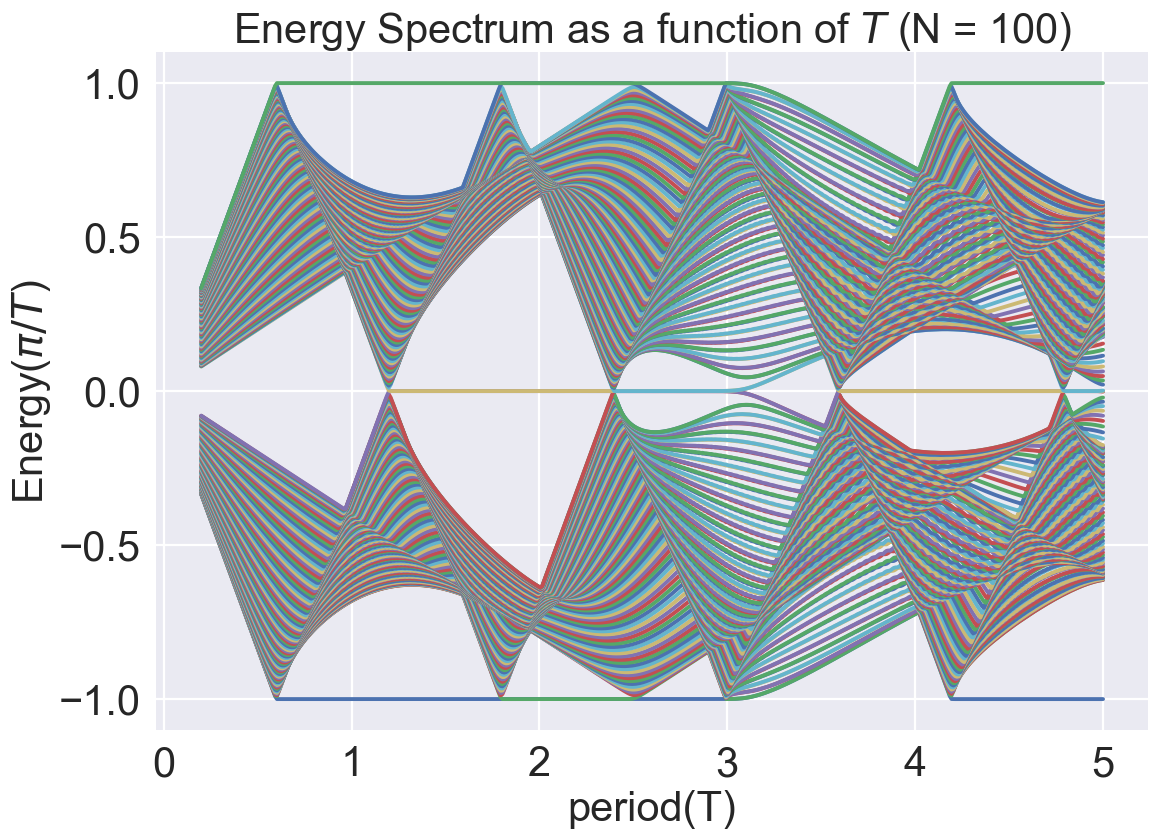

In [140]:
energiesv2 = np.array(energiesv2)
plt.title(f"Energy Spectrum as a function of $T$ (N = {N_global})")
for i in range(2*N_global):
    #plt.plot(var_T,energies[:,i]/np.pi)
    plt.plot(var_T[:],energiesv2[:,i])
plt.ylabel('Energy($\pi/T$)')
plt.xlabel('period(T)')
plt.yticks([-1,-0.5,0,0.5,1])
#plt.savefig(f'spectrum-mu1={mu1}t,mu2={mu2}t,delta={delta1}t,N={N_global}.pdf')
plt.show()

In [ ]:
eval, evec = (floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=2.9))
smol = 1E-7
zero_modes = plot_modes(eval,evec,0,e_threshold=smol)
pi_modes = plot_modes(eval,evec,1, e_threshold=smol)
#half_pi_modes = plot_modes(eval,evec,0.5, e_threshold=smol)

In [ ]:
print(1j*(evec[:,zero_modes[1]]-evec[:,zero_modes[0]]))

In [ ]:
print(zero_modes_nums)

In [ ]:
print(pi_modes_nums)

the first axis is period, the second axis is frequency, the third and fourth axes are the green function elements 

In [ ]:

for j in tqdm(range(len(var_T))):
    f_odd = [(Gs_odd[j][i][0,1]).real for i in range(len(var_w))]
    plt.title(f"edge odd-w pairing at $T =${var_T[j]} as a function of frequency ")
    plt.plot(var_w,np.abs(f_odd))
    plt.ylabel('odd-w amplitude')
    plt.xlabel('$frequency$')
    plt.yscale('log')
    plt.legend()
    plt.show()


In [ ]:

for j in tqdm(range(len(var_T))):
    f_odd = [(Gs_odd[j][0][0+n*d_global,1+n*d_global].imag) for n in range(N_global)]
    plt.title(f"edge odd-w pairing inside the bulk at $T =${var_T[j]} ")
    plt.plot(range(N_global),np.abs(f_odd))
    plt.ylabel('odd-w amplitude at w = 0')
    plt.xlabel('$lattice site$')
    #plt.yscale('log')
    plt.legend()
    plt.show()
    eval, evec = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])
    smol = 1E-4
    zero_modes = plot_modes(eval,evec,0,e_threshold=smol)


In [ ]:

for j in tqdm(range(len(var_T))):
    f_odd = [(Gs_odd[j][1][0+n*d_global,1+n*d_global].imag) for n in range(N_global)]
    plt.title(f"edge odd-w pairing inside the bulk at $T =${var_T[j]} ")
    plt.plot(range(N_global),np.abs(f_odd)*1000)
    plt.ylabel('odd-w amplitude at w = pi')
    plt.xlabel('lattice site')
    #plt.yscale('log')
    plt.legend()
    plt.show()
    eval, evec = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()], T=var_T[j])
    smol = 1E-4
    zero_modes = plot_modes(eval,evec,1,e_threshold=smol)


In [ ]:
x, y = np.meshgrid(var_T, var_w)
f_odd = np.zeros((len(var_w),len(var_T)),dtype =complex)
for i in range(len(var_T)):
    for j in range(len(var_w)):
        f_odd[j,i] = Gs_odd[i][j][0,1]

fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y, np.log(np.abs(f_odd)))
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('period')
ax.set_ylabel('frequency')
plt.show()

In [ ]:
energiesv2 = np.array(energiesv2)
plt.title(f"Energy Spectrum as a function of $T$ (N = {N_global})")
for i in range(2*N_global):
    #plt.plot(var_T,energies[:,i]/np.pi)
    plt.plot(var_T[:],energiesv2[:,i])
plt.ylabel('Energy')
plt.xlabel('period(T)')
plt.show()

In [ ]:
def winding_number(_h,gamma,trapz = True, k_steps = 200):
    _var_k = np.linspace(-np.pi,np.pi,k_steps)
    _y =lambda k: (-1j/(4*np.pi))*np.trace(gamma@la.inv(_h(k))@(dif(_h,k,dx=1/k_steps)))
    if trapz:
        return np.trapz([_y(k) for k in _var_k],_var_k)
    else:
        _yreal = lambda k: np.real(_y(k))
        _yimag = lambda k: np.imag(_y(k))
        real_integral = quad(_yreal,-np.pi,np.pi)
        imag_integral = quad(_yimag,-np.pi,np.pi)
        return np.array(real_integral[0] + 1j*imag_integral[0])


windings1 = []
windings2 = []
for j in tqdm(range(len(var_T))):
    winding1 = []
    winding2 = []
    for w in var_w:
        flq_kitv_k1 = lambda k: (w+1j*1e-6)*s_0 - floquet_hamiltonian2([(3/4)*h_2.k_space_hamiltonian(k), (3/2)*h_1.k_space_hamiltonian(k),(3/4)*h_2.k_space_hamiltonian(k)], T=var_T[j])
        flq_kitv_k2 = lambda k: (w+1j*1e-6)*s_0 - floquet_hamiltonian2([(3/4)*h_1.k_space_hamiltonian(k), (3/2)*h_2.k_space_hamiltonian(k),(3/4)*h_1.k_space_hamiltonian(k)], T=var_T[j])
        flq_kitv_k1 = lambda k:  floquet_hamiltonian2([(3/4)*h_2.k_space_hamiltonian(k), (3/2)*h_1.k_space_hamiltonian(k),(3/4)*h_2.k_space_hamiltonian(k)], T=var_T[j])
        flq_kitv_k2 = lambda k:  floquet_hamiltonian2([(3/4)*h_1.k_space_hamiltonian(k), (3/2)*h_2.k_space_hamiltonian(k),(3/4)*h_1.k_space_hamiltonian(k)], T=var_T[j])
        w1 = winding_number(flq_kitv_k1,s_x,trapz=True)
        w2 = winding_number(flq_kitv_k2,s_x, trapz=True)
        winding1.append(w1)
        winding2.append(w2)

    windings1.append(winding1)
    windings2.append(winding2)
    pass

windings1 = np.array(windings1)
windings2 = np.array(windings2)

In [ ]:
for i in range(len(var_T)):
    print(var_T[i])
    plt.title(f"winding number as a function of T = {var_T[i]}")
    plt.plot(var_w,((windings1-windings2)[i,:]/(var_w+1e-6*1j)),label='pi majorana')
    plt.plot(var_w,((windings1+windings2)[i,:]/(var_w+1e-6*1j)), label = 'zero majorana')
    plt.ylabel('winging number')
    plt.xlabel('$T$')
    #plt.yscale('log')
    plt.legend()
    plt.show()


In [ ]:
for i in range(len(var_w)):
    print(var_w[i])
    plt.title(f"winding number as a function of w = {var_w[i]}")
    plt.plot(var_T,(((windings1-windings2)[:,i]/(1-var_w[i]+1e-6*1j)).imag),label='pi majorana')
    plt.plot(var_T,(((windings1+windings2)[:,i]/(var_w[i]+1e-6*1j)).imag), label = 'zero majorana')
    plt.ylabel('winging number')
    plt.xlabel('$\omega$')
    #plt.yscale('log')
    plt.legend()
    plt.show()


In [ ]:

plt.title("winding number as a function of T ")
plt.plot(var_T,(windings1+windings2)[:,0],label='zero majorana')
plt.plot(var_T,(windings2-windings1)[:,0],label='pi majorana')
plt.ylabel('winging number')
plt.xlabel('$T$')
#plt.yscale('log')
plt.legend()
plt.show()

In [ ]:

windings1 = []
windings2 = []
for j in tqdm(range(len(var_T))):
    flq_kitv_k1 = lambda k: floquet_hamiltonian2([(3/4)*h_2.k_space_hamiltonian(k), (3/2)*h_1.k_space_hamiltonian(k),(3/4)*h_2.k_space_hamiltonian(k)], T=var_T[j])
    flq_kitv_k2 = lambda k: floquet_hamiltonian2([(3/4)*h_1.k_space_hamiltonian(k), (3/2)*h_2.k_space_hamiltonian(k),(3/4)*h_1.k_space_hamiltonian(k)], T=var_T[j])

    w1 = winding_number(flq_kitv_k1,s_x,k_steps=200)
    w2 = winding_number(flq_kitv_k2,s_x,k_steps=200)
    windings1.append(w1)
    windings2.append(w2)


windings1 = np.array(windings1)
windings2 = np.array(windings2)

plt.title("winding number as a function of T ")
plt.plot(var_T,(windings1-windings2),label='pi majorana')
plt.plot(var_T,(windings1+windings2), label = 'zero majorana')
plt.ylabel('winging number')
plt.xlabel('$T$')
#plt.yscale('log')
plt.legend()
plt.show()
